In [1]:
import pandas as pd
import matplotlib.pyplot as plt

2023-01-01     0
2023-01-02     1
2023-01-03     2
2023-01-04     3
2023-01-05     4
              ..
2023-04-06    95
2023-04-07    96
2023-04-08    97
2023-04-09    98
2023-04-10    99
Freq: D, Length: 100, dtype: int64


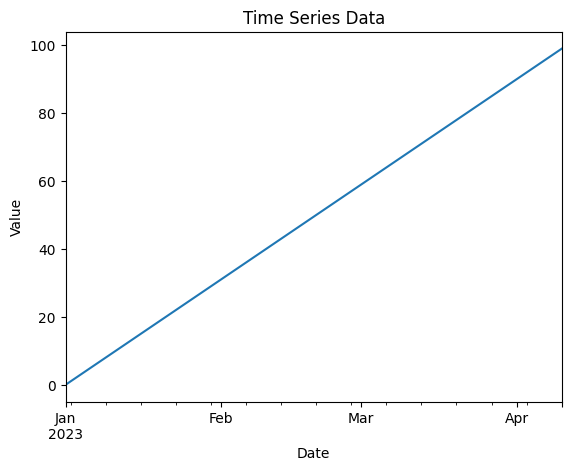

In [2]:
# 날짜 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')  # 100일 동안의 날짜 생성

# 임의의 시계열 데이터 생성
data = pd.Series(range(100), index=dates)

# 시계열 데이터 출력
print(data)

# 시계열 데이터 시각화
data.plot()
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

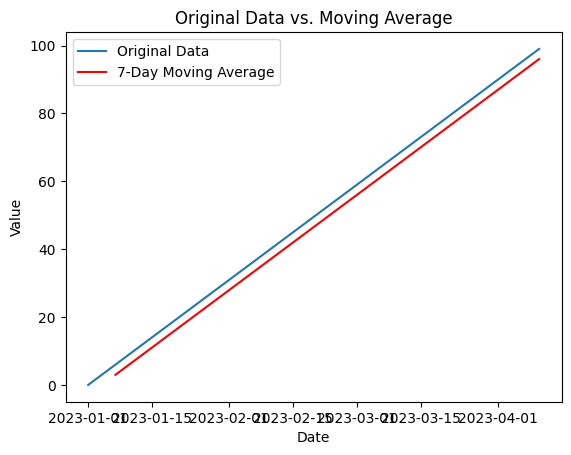

In [3]:
# 이동 평균 계산 (window=7은 7일 동안의 평균을 의미)
moving_average = data.rolling(window=7).mean()

# 원본 데이터와 이동 평균을 함께 시각화
plt.plot(data, label='Original Data')
plt.plot(moving_average, label='7-Day Moving Average', color='red')
plt.legend()
plt.title('Original Data vs. Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

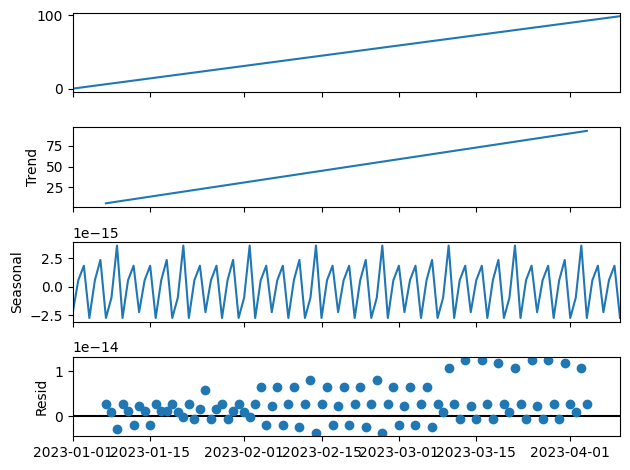

In [7]:
# 시계열 분해 (임의 데이터에 계절성 부여)
result = seasonal_decompose(data, model='additive', period=12)

# 각 성분 시각화
result.plot()
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

/root/miniconda3/envs/my_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


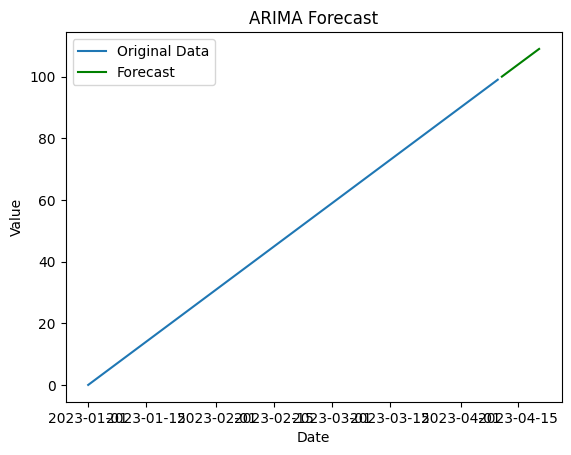

In [9]:
# ARIMA 모델 생성 및 적합 (p=1, d=1, q=1)
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

# 예측
forecast = model_fit.forecast(steps=10)

# 예측 결과 시각화
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [11]:
import numpy as np

In [12]:
trend = np.array((1142, 1242, 1252, 1343,
                    1225, 1562, 1356, 1572,
                    1343, 1459, 1412, 1453,
                    1401, 1478, 1322, 1606,
                    1554, 1589, 1597, 1408) ).reshape(5,4)
trend_ts = pd.DataFrame(trend, index=range(2016, 2021), columns=['Qtr1', 'Qtr2','Qtr3','Qtr4'])
trend_ts = trend_ts.stack().reset_index()
display(trend_ts)

,level_0,level_1,0
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1252
3,2016,Qtr4,1343
4,2017,Qtr1,1225
5,2017,Qtr2,1562
6,2017,Qtr3,1356
7,2017,Qtr4,1572
8,2018,Qtr1,1343
9,2018,Qtr2,1459
